In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set visualization style
sns.set(style="whitegrid")
%matplotlib inline

# Load the dataset
df = pd.read_csv('udemy_courses.csv')
print(f"Dataset Loaded: {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Dataset Loaded: 3678 rows and 12 columns


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [2]:
# Check for null values
print("Null Values:\n", df.isnull().sum())

# Remove duplicates
duplicates_count = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"\nRemoved {duplicates_count} duplicate rows.")

# Drop non-predictive columns
df.drop(columns=['course_id', 'url'], inplace=True, errors='ignore')

# Convert timestamp to datetime and extract time features
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['year'] = df['published_timestamp'].dt.year
df['month'] = df['published_timestamp'].dt.month

# Clean up data types
df['is_paid'] = df['is_paid'].astype(int)
df.info()

Null Values:
 course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Removed 6 duplicate rows.
<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_title         3672 non-null   object             
 1   is_paid              3672 non-null   int64              
 2   price                3672 non-null   int64              
 3   num_subscribers      3672 non-null   int64              
 4   num_reviews          3672 non-null   int64              
 5   num_lectures         3672 non-null   int64              
 6   level                3672 non-null   object

In [3]:
# Create Expected Profit (Price * Subscribers)
df['expected_profit'] = df['price'] * df['num_subscribers']

# Display summary statistics for numerical columns
df.describe()

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,year,month,expected_profit
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03
mean,0.915577,66.102941,3190.586874,156.371460,40.140251,4.097603,2015.431100,6.165305,2.401076e+05
std,0.278058,61.035920,9488.105448,936.178649,50.417102,6.057830,1.184731,3.380390,1.000954e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,0.000000e+00
25%,1.000000,20.000000,111.750000,4.000000,15.000000,1.000000,2015.000000,3.000000,1.620000e+03
50%,1.000000,45.000000,912.000000,18.000000,25.000000,2.000000,2016.000000,6.000000,2.317500e+04
75%,1.000000,95.000000,2548.750000,67.000000,46.000000,4.500000,2016.000000,9.000000,1.189025e+05
max,1.000000,200.000000,268923.000000,27445.000000,779.000000,78.500000,2017.000000,12.000000,2.431680e+07


C:\Users\sshar\AppData\Local\Temp\ipykernel_26580\1644144767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subject', palette='viridis')


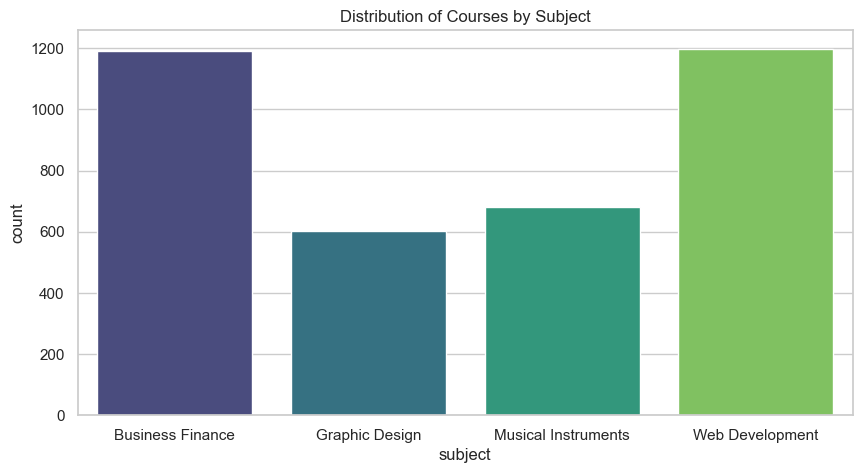

C:\Users\sshar\AppData\Local\Temp\ipykernel_26580\1644144767.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='level', y='expected_profit', estimator=sum, ci=None)


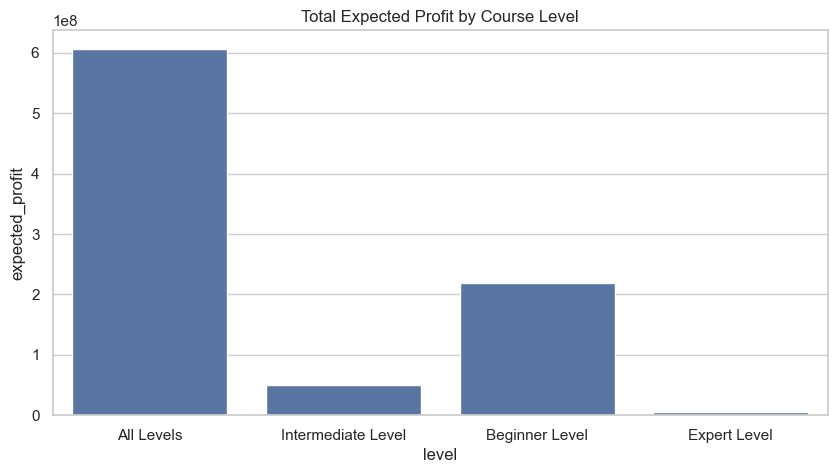

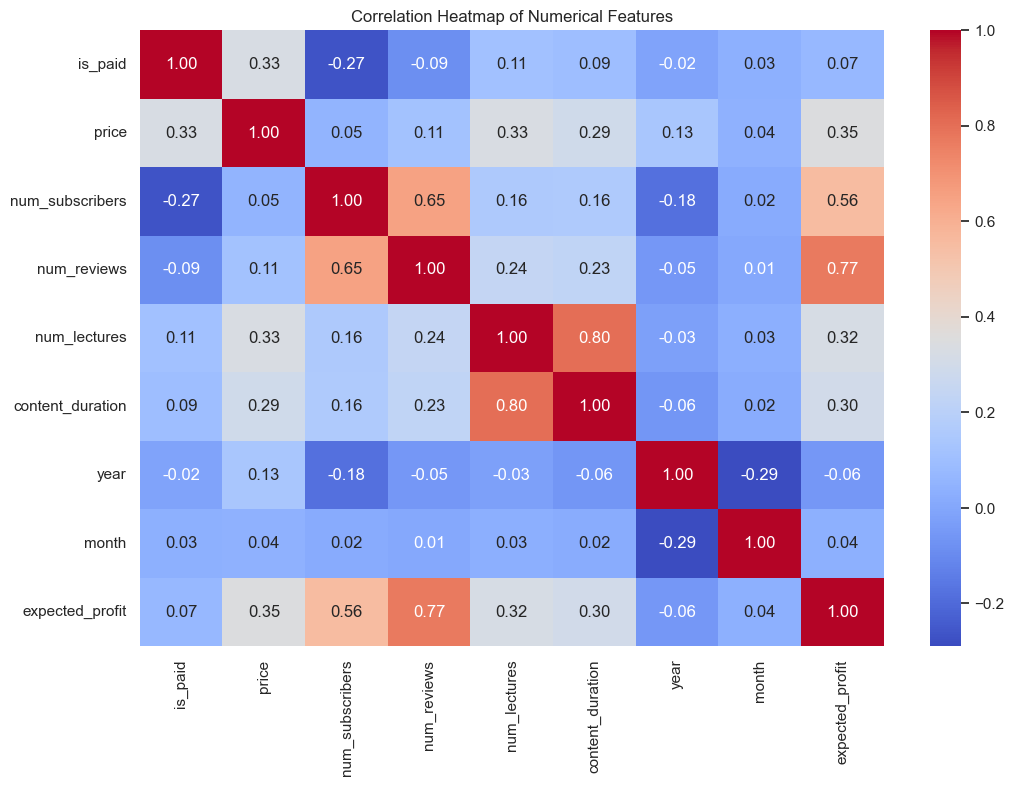

In [4]:
# 1. Subject Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='subject', palette='viridis')
plt.title('Distribution of Courses by Subject')
plt.show()

# 2. Level vs Profit
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='level', y='expected_profit', estimator=sum, ci=None)
plt.title('Total Expected Profit by Course Level')
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(12, 8))
numerical_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [5]:
# Prepare for Linear Regression
# Convert categorical features (subject, level) into dummy variables
df_ml = pd.get_dummies(df, columns=['subject', 'level'], drop_first=True)

# Define Features (X) and Target (y)
# We want to predict Popularity (Subscribers) based on other factors
features = ['price', 'num_reviews', 'num_lectures', 'content_duration', 'is_paid'] + \
           [col for col in df_ml.columns if col.startswith('subject_') or col.startswith('level_')]

X = df_ml[features]
y = df_ml['num_subscribers']

# Split the data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 2937
Test set size: 735


In [6]:
# Initialize and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression R2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

# Display Coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients (Impact on Subscribers):")
print(coefficients)

Linear Regression R2 Score: 0.6127
Mean Squared Error: 27290082.45

Feature Coefficients (Impact on Subscribers):
                        Feature  Coefficient
7       subject_Web Development  2862.770130
5        subject_Graphic Design   352.699623
8          level_Beginner Level    87.676602
3              content_duration    42.491383
6   subject_Musical Instruments    40.562452
1                   num_reviews     6.491988
0                         price     5.553952
2                  num_lectures    -4.911838
10     level_Intermediate Level  -999.544241
9            level_Expert Level -1049.161772
4                       is_paid -7654.753119


C:\Users\sshar\AppData\Local\Temp\ipykernel_26580\3771624879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='magma')


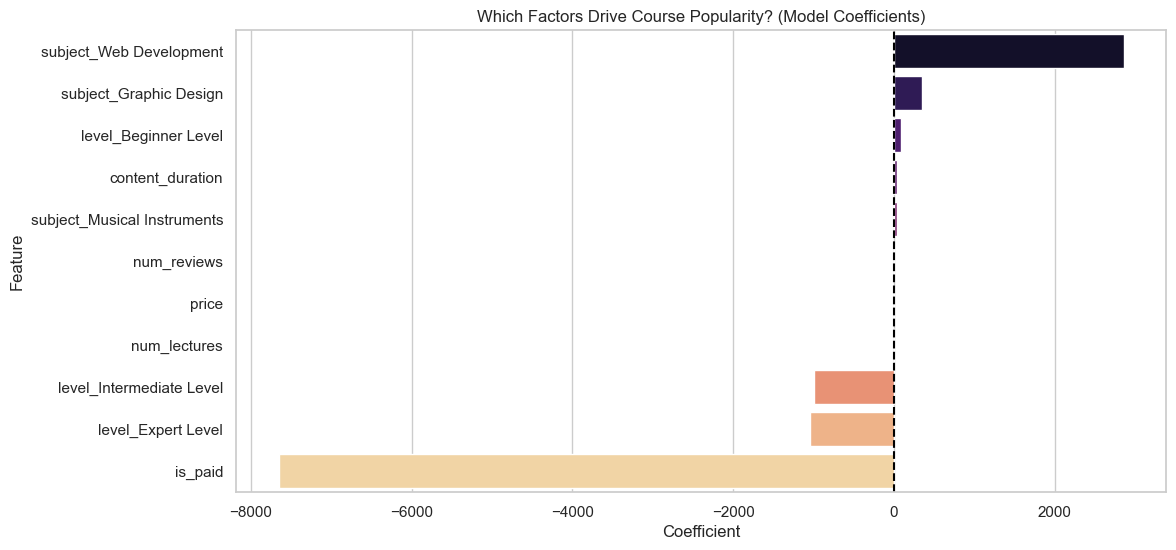

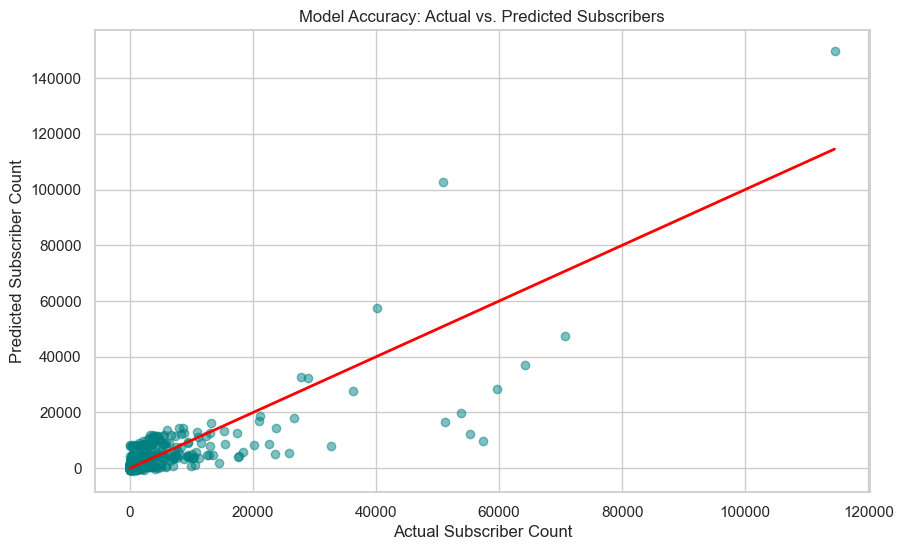

In [7]:
# Plotting Coefficients to see most influential factors
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='magma')
plt.title('Which Factors Drive Course Popularity? (Model Coefficients)')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Subscriber Count')
plt.ylabel('Predicted Subscriber Count')
plt.title('Model Accuracy: Actual vs. Predicted Subscribers')
plt.show()

In [8]:
# Create a quick summary of the findings
print("--- STRATEGIC INSIGHTS ---")
top_subject = coefficients.iloc[0]['Feature']
print(f"1. Most Impactful Subject: {top_subject}")
print(f"2. Reviews vs Subscribers: For every 1 review, the model predicts ~{model.coef_[1]:.2f} additional subscribers.")
print(f"3. Pricing Impact: Price has a coefficient of {model.coef_[0]:.2f}, indicating higher prices slightly reduce total volume.")

--- STRATEGIC INSIGHTS ---
1. Most Impactful Subject: subject_Web Development
2. Reviews vs Subscribers: For every 1 review, the model predicts ~6.49 additional subscribers.
3. Pricing Impact: Price has a coefficient of 5.55, indicating higher prices slightly reduce total volume.
